# Importing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pickle
from sklearn.model_selection import GridSearchCV


%matplotlib inline

In [3]:
data = pd.read_csv("SongPopularity_Milestone2.csv")

In [4]:
data.shape

(6191, 24)

In [14]:
cat = [i for i in data.columns if data[i].dtypes == "O"]
noncat = [i for i in data.columns if data[i].dtypes != "O"]

for col in cat:
    print(f"{col}: {data[col].mode()[0]}")

Song: Heaven
Album: Greatest Hits
Album Release Date: 1/1/2010
Artist Names: ['The Karaoke Channel']
Artist(s) Genres: []
Spotify Link: https://open.spotify.com/track/0bYg9bo50gSsH3LtXe2SQn
Song Image: https://i.scdn.co/image/ab67616d00001e021fc9fd5d701ee05cb39b7b19
Spotify URI: spotify:track:0bYg9bo50gSsH3LtXe2SQn
PopularityLevel: Average


In [15]:
for col in noncat:
    print(f"{col}: {data[col].mean()}")

Hot100 Ranking Year: 1987.8481666935875
Hot100 Rank: 48.320626716200934
Song Length(ms): 224626.53529316752
Acousticness: 0.3000630259602649
Danceability: 0.6177100629946697
Energy: 0.5968806493296721
Instrumentalness: 0.04599186652560168
Liveness: 0.18075475690518497
Loudness: -8.718823937974479
Speechiness: 0.07203839444354708
Tempo: 119.00919770634792
Valence: 0.5963210628331449
Key: 5.240833467937328
Mode: 0.7058633500242287
Time Signature: 3.9410434501696012


# Split the data

In [5]:
X = data.drop(['PopularityLevel'], axis=1)
Y = data["PopularityLevel"]

In [12]:
cat = [i for i in X.columns if X[i].dtypes == "O"]
noncat = [i for i in X.columns if X[i].dtypes != "O"]

for col in cat:
    print(f"{col}: {X[col].mode()[0]}")



Song: Heaven
Album: Greatest Hits
Album Release Date: 1/1/2010
Artist Names: ['The Karaoke Channel']
Artist(s) Genres: []
Spotify Link: https://open.spotify.com/track/0bYg9bo50gSsH3LtXe2SQn
Song Image: https://i.scdn.co/image/ab67616d00001e021fc9fd5d701ee05cb39b7b19
Spotify URI: spotify:track:0bYg9bo50gSsH3LtXe2SQn


In [5]:
Y = Y.replace({'Not Popular': 0, 'Average': 1, 'Popular': 2})


In [6]:
x_train ,x_test, y_train ,y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4952, 23)
(1239, 23)
(4952,)
(1239,)


In [8]:
x_train.isnull().sum()

Song                   0
Album                  0
Album Release Date     0
Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Spotify Link           0
Song Image             0
Spotify URI            0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
dtype: int64

In [9]:
x_train.duplicated().sum()

0

In [10]:
x_train.describe()

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
count,4952.000000,4952.000000,4.952000e+03,4952.000000,4952.000000,4952.000000,4952.000000,4952.000000,4952.00000,4952.000000,4952.000000,4952.000000,4952.000000,4952.000000,4952.000000
mean,1988.072092,48.617528,2.257306e+05,0.296524,0.619903,0.598789,0.044924,0.179078,-8.71525,0.072291,118.903913,0.596642,5.265953,0.703554,3.942044
std,20.154920,29.237567,6.542577e+04,0.288974,0.156031,0.204853,0.167428,0.148969,3.80822,0.079931,28.219778,0.241738,3.588417,0.456736,0.303606
min,1946.000000,1.000000,5.180000e+04,0.000004,0.000000,0.012000,0.000000,0.015000,-37.84100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1972.000000,23.000000,1.824520e+05,0.048575,0.524000,0.457000,0.000000,0.086700,-11.14975,0.032375,97.629500,0.406000,2.000000,0.000000,4.000000
50%,1988.000000,48.000000,2.216065e+05,0.193000,0.636000,0.619000,0.000004,0.122000,-8.08250,0.041500,117.776500,0.613000,5.000000,1.000000,4.000000
75%,2005.000000,74.000000,2.578465e+05,0.500250,0.729000,0.759000,0.000463,0.229000,-5.73100,0.069100,134.288500,0.803250,8.000000,1.000000,4.000000
max,2022.000000,100.000000,1.561133e+06,0.995000,0.988000,0.997000,0.971000,0.985000,-0.81000,0.911000,231.025000,0.991000,11.000000,1.000000,5.000000


# Preprocessing & Feature Engineering

* Extract Year from album release date

In [11]:
def extract_year(date_str):
    try:
        return pd.to_datetime(date_str, errors= 'coerce').year
    except:
        return None


x_train['Album Release Date'] = x_train['Album Release Date'].apply(extract_year)


x_train['Album Release Date'] = x_train['Album Release Date'].fillna(x_train['Album Release Date'].loc[x_train['Album Release Date'].notna()].astype(str))

x_train.rename(columns={'Album Release Date': 'Album Release Year'}, inplace=True)


* Categorize The Artist name column

In [12]:
def categorize_names(names_list):
    num_names = len(names_list)
    if num_names == 1:
        return 'single'
    elif num_names == 2:
        return 'duo'
    else:
        return 'band'

# Apply categorization function to create a new column
x_train['ArtistCount'] = x_train['Artist Names'].apply(lambda x: categorize_names(eval(x)))

In [13]:
def categorize_genres(genres_list):
    if any('pop' in genre.lower() for genre in genres_list):
        return 'Pop'
    elif any('hip hop' in genre.lower() for genre in genres_list):
        return 'Hip Hop/Rap'
    elif any('country' in genre.lower() for genre in genres_list):
        return 'Country'
    elif any('electropop' in genre.lower() for genre in genres_list):
        return 'Electropop'
    elif any('standards' in genre.lower() for genre in genres_list):
        return 'Adult Standards'
    else:
        return 'Others'
    
# Apply categorization function to create a new column
x_train['Genre'] = x_train['Artist(s) Genres'].apply(lambda x: categorize_genres(eval(x)))

In [14]:
x_train['Genre'].value_counts()

Genre
Others             2106
Pop                2098
Adult Standards     275
Country             271
Hip Hop/Rap         202
Name: count, dtype: int64

In [15]:
current_year = datetime.datetime.now().year

# Calculate the age of the song
x_train['Song Age'] = current_year - x_train['Album Release Year']

In [16]:
x_train.drop(['Song','Album','Artist(s) Genres','Spotify Link', 'Song Image','Spotify URI', 'Artist Names'], axis = 1 , inplace = True)

In [17]:
categorical = [i for i in x_train.columns if x_train[i].dtypes == "O"]

for feature in  categorical:
    print(x_train[feature].value_counts())
    print("\n \n ")

ArtistCount
single    4184
duo        589
band       179
Name: count, dtype: int64

 
 
Genre
Others             2106
Pop                2098
Adult Standards     275
Country             271
Hip Hop/Rap         202
Name: count, dtype: int64

 
 


In [18]:
categorical

['ArtistCount', 'Genre']

# Encoding

In [19]:
label_encoders ={}
for col in categorical:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])

In [20]:
x_train.describe()

,Album Release Year,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature,ArtistCount,Genre,Song Age
count,4952.000000,4952.000000,4952.000000,4.952000e+03,4952.000000,4952.000000,4952.000000,4952.000000,4952.000000,4952.00000,4952.000000,4952.000000,4952.000000,4952.000000,4952.000000,4952.000000,4952.000000,4952.000000,4952.000000
mean,1995.527060,1988.072092,48.617528,2.257306e+05,0.296524,0.619903,0.598789,0.044924,0.179078,-8.71525,0.072291,118.903913,0.596642,5.265953,0.703554,3.942044,1.808764,3.106826,28.472940
std,18.315092,20.154920,29.237567,6.542577e+04,0.288974,0.156031,0.204853,0.167428,0.148969,3.80822,0.079931,28.219778,0.241738,3.588417,0.456736,0.303606,0.476450,1.082582,18.315092
min,1899.000000,1946.000000,1.000000,5.180000e+04,0.000004,0.000000,0.012000,0.000000,0.015000,-37.84100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1981.000000,1972.000000,23.000000,1.824520e+05,0.048575,0.524000,0.457000,0.000000,0.086700,-11.14975,0.032375,97.629500,0.406000,2.000000,0.000000,4.000000,2.000000,3.000000,13.000000
50%,1998.000000,1988.000000,48.000000,2.216065e+05,0.193000,0.636000,0.619000,0.000004,0.122000,-8.08250,0.041500,117.776500,0.613000,5.000000,1.000000,4.000000,2.000000,3.000000,26.000000
75%,2011.000000,2005.000000,74.000000,2.578465e+05,0.500250,0.729000,0.759000,0.000463,0.229000,-5.73100,0.069100,134.288500,0.803250,8.000000,1.000000,4.000000,2.000000,4.000000,43.000000
max,2023.000000,2022.000000,100.000000,1.561133e+06,0.995000,0.988000,0.997000,0.971000,0.985000,-0.81000,0.911000,231.025000,0.991000,11.000000,1.000000,5.000000,2.000000,4.000000,125.000000


# Feature selection & Scaling

In [21]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

x_categorical = x_train[['Key','Mode','Time Signature','ArtistCount','Genre']]
chi2_features = SelectKBest(chi2, k=3)
x_best_categorical = chi2_features.fit_transform(x_categorical,y_train)

# Get the indices of the selected features
selected_feature_indices = chi2_features.get_support(indices=True)
selected_features = x_categorical.columns[selected_feature_indices]

print("Selected Categorical Features:")
print(selected_features)

Selected Categorical Features:
Index(['Key', 'Mode', 'Genre'], dtype='object')


In [22]:
x_numerical = x_train.drop(['Key','Mode','Time Signature','ArtistCount','Genre'],axis= 1)
normalize = MinMaxScaler()
x_normalized = normalize.fit_transform(x_numerical)
x_normalized= pd.DataFrame(x_normalized, columns= x_numerical.columns)

In [23]:
x_normalized.head()

,Album Release Year,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Song Age
0,0.887097,0.578947,0.040404,0.175583,0.003805,0.745951,0.881218,0.003615,0.414433,0.847722,0.047530,0.502102,0.331988,0.112903
1,0.911290,0.868421,1.000000,0.118233,0.014368,0.592105,0.974619,0.000000,0.057423,0.901704,0.058617,0.476165,0.590313,0.088710
2,0.879032,0.828947,0.393939,0.131007,0.016177,0.688259,0.685279,0.000000,0.253608,0.855472,0.077827,0.649510,0.471241,0.120968
3,0.911290,0.539474,0.585859,0.129567,0.004640,0.796559,0.890355,0.435633,0.053093,0.919635,0.043578,0.493847,0.397578,0.088710
4,0.911290,0.223684,0.919192,0.054505,0.206027,0.405870,0.914721,0.000473,0.128866,0.947476,0.186608,0.564121,0.668012,0.088710


In [24]:
from sklearn.feature_selection import SelectKBest, f_classif


fischer_features = SelectKBest(score_func=f_classif, k=6)
x_best_numerical = fischer_features.fit_transform(x_normalized, y_train)

# Get the indices of the selected features
selected_feature_indices = fischer_features.get_support(indices=True)
selected_features = x_normalized.columns[selected_feature_indices]

print("Selected Numerical Features based on Fisher's Score:")
print(selected_features)

Selected Numerical Features based on Fisher's Score:
Index(['Album Release Year', 'Hot100 Ranking Year', 'Acousticness', 'Energy',
       'Loudness', 'Song Age'],
      dtype='object')


In [25]:
selected_numerical_features = x_normalized[['Hot100 Ranking Year', 'Album Release Year', 'Song Age', 'Loudness', 'Acousticness', 'Energy','Song Length(ms)']]
selected_categorical_features = x_train[['Key', 'Mode', 'Genre']]
selected_numerical_features.reset_index(drop=True, inplace=True)
selected_categorical_features.reset_index(drop=True, inplace=True)
x_selected = pd.concat([selected_numerical_features, selected_categorical_features], axis=1)


# Model Evaluation

In [26]:
from sklearn.metrics import accuracy_score 
import time

def model_val(model, x_train, y_train):
    start_time = time.time()
    model.fit(x_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    training_time = round(training_time, 5)
    Y_train_pred = model.predict(x_train)
    accuracy = accuracy_score(y_train, Y_train_pred)
    print(f"accuracy is {accuracy}")
    print(f"Training time: {training_time} seconds")
    return accuracy, training_time
    

In [27]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_acc, LR_time = model_val(LR_model,x_selected,y_train)

accuracy is 0.595718901453958
Training time: 0.1412 seconds


c:\Users\yassi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 1000, 10000],
}

grid_search = GridSearchCV(LR_model, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_selected, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'C': 100, 'max_iter': 1000}
Best score: 0.5953160260526558


In [29]:
from sklearn import svm
SVM_model = svm.SVC(kernel= 'linear', C = 5)
SVM_acc, SVM_time =model_val(SVM_model,x_selected,y_train)

accuracy is 0.6003634894991923
Training time: 3.47628 seconds


In [30]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=9)
KNN_acc, KNN_time =model_val(KNN_model, x_selected, y_train)

accuracy is 0.6544830371567044
Training time: 0.02657 seconds


In [31]:
from sklearn.ensemble import  GradientBoostingClassifier

GB_model = GradientBoostingClassifier()
GB_acc, GB_time =model_val(GB_model, x_selected, y_train)

accuracy is 0.7003231017770598
Training time: 7.48338 seconds


In [32]:
from sklearn.ensemble import VotingClassifier




base_models = [
    ('knn', KNeighborsClassifier()),
    ('gb', GradientBoostingClassifier(n_estimators=100)),
    ('svm', SVC(kernel='linear', C=5, probability=True))  # Enable probability estimation
]


voting_classifier = VotingClassifier(estimators=base_models, voting='soft')

vot_acc, vot_time = model_val(voting_classifier, x_selected, y_train)

accuracy is 0.6948707592891761
Training time: 28.22107 seconds


In [33]:
from sklearn.ensemble import StackingClassifier


base_models = [
    ('svm', SVC(kernel='linear', C=5, probability=True)),
    ('gb', GradientBoostingClassifier(n_estimators=100)),
    ('knn', KNeighborsClassifier())
]


stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

stack_acc, stack_time = model_val(stacking_classifier, x_selected, y_train)

accuracy is 0.7023424878836834
Training time: 120.98649 seconds


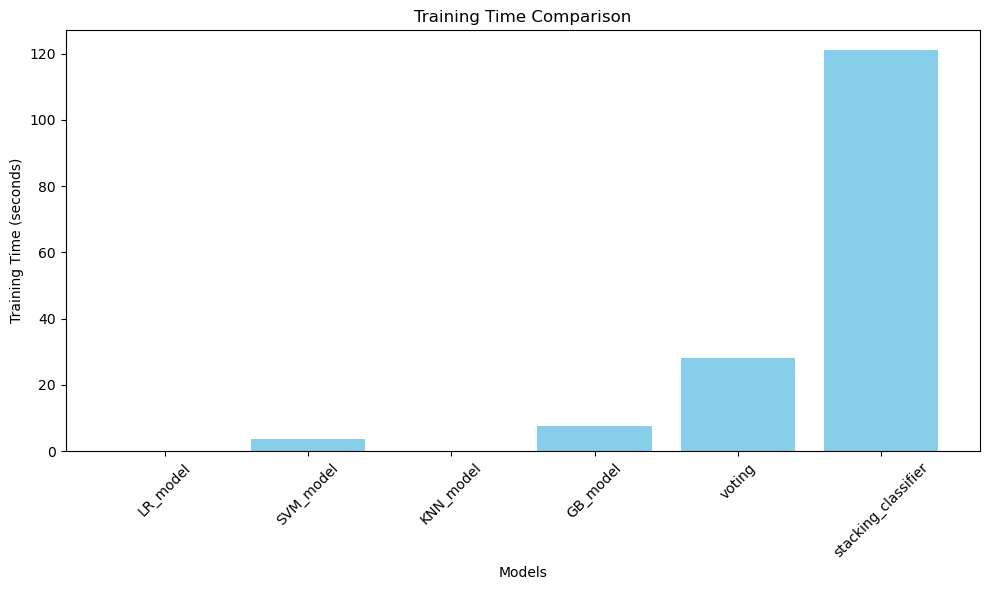

In [34]:
models = ['LR_model','SVM_model', 'KNN_model',  'GB_model', 'voting', 'stacking_classifier']

training_times = [LR_time, SVM_time, KNN_time, GB_time, vot_time, stack_time]


plt.figure(figsize=(10, 6))  

plt.bar(models, training_times, color='skyblue')  

plt.xlabel('Models') 
plt.ylabel('Training Time (seconds)')  
plt.title('Training Time Comparison')  

plt.xticks(rotation=45)  

plt.tight_layout() 
plt.show()  

# Saving the Models

In [35]:
import pickle 

# Encoding Model

pickle.dump(le,open("Models/Encoding model.pkl", "wb") )


In [36]:
# Scaling Model

pickle.dump(normalize,open("Models/Normalization model.pkl", "wb") )


In [37]:
# Machine learning models



pickle.dump(GB_model,open("Models/GB model.pkl", "wb") )

pickle.dump(voting_classifier,open("Models/voting model.pkl", "wb") )

pickle.dump(stacking_classifier,open("Models/stacking model.pkl", "wb") )


# Testing

x_test, y_test

In [41]:
x_test['Album Release Date'] = x_test['Album Release Date'].apply(extract_year)


x_test['Album Release Date'] = x_test['Album Release Date'].fillna(x_test['Album Release Date'].loc[x_test['Album Release Date'].notna()].astype(str))

x_test.rename(columns={'Album Release Date': 'Album Release Year'}, inplace=True)


# Apply categorization function to create a new column
x_test['ArtistCount'] = x_test['Artist Names'].apply(lambda x: categorize_names(eval(x)))

# Apply categorization function to create a new column
x_test['Genre'] = x_test['Artist(s) Genres'].apply(lambda x: categorize_genres(eval(x)))


current_year = datetime.datetime.now().year

# Calculate the age of the song
x_test['Song Age'] = current_year - x_test['Album Release Year']

In [42]:
x_test.drop(['Song','Album','Artist(s) Genres','Spotify Link', 'Song Image','Spotify URI', 'Artist Names'], axis = 1 , inplace = True)

 *Reading*

In [43]:
encoding_model = pickle.load(open("Models/Encoding model.pkl", "rb"))

normalization_model = pickle.load(open("Models/Normalization model.pkl", "rb"))

GB_model = pickle.load(open("Models/GB model.pkl", "rb"))

voting_model = pickle.load(open("Models/voting model.pkl", "rb"))

stacking_model = pickle.load(open("Models/stacking model.pkl", "rb"))



In [44]:
categorical_columns = [i for i in x_test.columns if x_test[i].dtype == "O"]

for col in categorical_columns:
     x_test[col] = x_test[col].apply(lambda x: encoding_model.transform([x])[0] if x in encoding_model.classes_ else -1)
    


In [45]:
x_numerical = x_test.drop(['Key','Mode','Time Signature','ArtistCount','Genre'],axis= 1)

x_normalized = normalization_model.transform(x_numerical)
x_normalized= pd.DataFrame(x_normalized, columns= x_numerical.columns)
x_normalized.reset_index(drop=True, inplace=True)

In [48]:
x_test.reset_index(drop=True, inplace=True)

In [50]:

columns_to_replace = ['Hot100 Ranking Year', 'Album Release Year', 'Song Age', 'Loudness', 'Acousticness', 'Energy', 'Song Length(ms)']


x_test[columns_to_replace] = x_normalized[columns_to_replace]


In [52]:
x_test = x_test[['Hot100 Ranking Year', 'Album Release Year', 'Song Age', 'Loudness', 'Acousticness', 'Energy', 'Song Length(ms)', 'Key', 'Mode', 'Genre']]


In [55]:
y_pred = GB_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy is {accuracy}")

accuracy is 0.6448748991121872


In [56]:
y_pred = voting_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy is {accuracy}")

accuracy is 0.639225181598063


In [57]:
y_pred = stacking_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy is {accuracy}")

accuracy is 0.6440677966101694
